# Practica 2 
# Gregorio Aarón Meza Ramos

In [1]:
#Cargando las librerias necesarias para la práctica
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math 

## Ejercicio 1
En Los viajes de Gulliver, los liliputienses decidieron alimentar a Gulliver con 1728 veces más comida de la que comía un liliputiense. Razonaron que, como Gulliver era 12 veces su altura, su volumen era $12^3 = 1728$ veces el volumen de un liliputiense y por lo tanto requería 1728 veces la cantidad de comida que uno de ellos. ¿Por qué su razonamiento era erróneo? ¿Cuál es la respuesta correcta?

**Respuesta:**

Vamos a pensar en que los liliputienses creyeron que era correcto elevar al cubo, es decir $12^3$ por que lo que se quería calcular era el volumen de Gulliver, pero esto solo funciona para para figuras geométricas cuyas dimensiones son las mismas y pues Gulliver no tiene dimensiones iguales aquí falla su razonamiento. 


Como Gulliver es 12 veces la altura de una habitante vamos a pensar que Gulliver tiene similitud geométrica a la de un liliputiense. Si el volumen de un liliputiense es $v_1$ y su consumo alimenticio es $c_1$ entonces podemos garantizar que el volumen de Gulliver $12v_1$ con consumo alimeticio de $12c_1$

## Ejercicio 2 : Campeonato de Pesca De Róbalo
Imaginemos que la competencia premia al pez más pesado, pero la única herramienta con la que contamos para determinar el peso de los peces es una cinta métrica. Como en las versiones anteriores del campeonato asistieron miles de participantes queremos poder predecir el peso de un pescado en término de algunas dimensiones fáciles de medir. A pesar de que el peso de un pescado se ve afectado por variables como la forma del pescado, la densidad del pescado, la edad del pescado, entre otras, haremos un modelo que dependa solo de variables medibles por nuestra cinta métrica. Algunos de los supuestos que usaremos en nuestro modelo son que: 
- La especie está fija y todos los pescados serán robalos. (En general esto sí sucede en los campeonatos).
- La densidad de los pescados es constante. (Esto es poco realista pero nos servirá para un primer modelo). 
- Las variables como la estación del año, el sexo, la edad, etc. no afectan al peso del róbalo. 
- Los róbalos son geométricamente similares. 
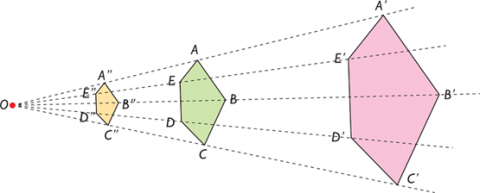

Ahora, recordando que la densidad ($\rho$) es igual a la masa entre el volumen, podemos calcular el peso ($W$) de un pescado multiplicando su volumen por su densidad:
$$
W = V \cdot  \rho
$$
Ahora, bajo nuestro supuesto de densidad constante y de similitud geométrica tenemos que 
\begin{eqnarray} W & \propto & V\ W & \propto & l^3 \end{eqnarray} 
A continuación pondremos a prueba nuestro primer modelo. 

**Nota:** 
- La **masa** corresponde a la cantidad de materia que compone un objeto determinado.
- El **peso**, en cambio, corresponde a la fuerza resultante de la acción que ejerce la gravedad de la Tierra (en nuestro caso) sobre la masa de un cuerpo $W=m⋅g$, y su unidad de medida es el **Newton (N)**. 

Para poder ajustar nuestro modelo necesitamos datos sobre el peso ($W$) y la longitud ($l$) de algunos pescados. Los únicos datos sobrevibientes de los campeonatos anteriores se encuentran en la siguiente tabla: <br>

| Peso(Kg)   |36.83| 31.75| 43.815| 36.83| 32.06| 45.08| 35.88|
|------------|-----|------|-------|------|------|------|------|
|Longitud(cm)|0.77 | 0.48 | 1.16  | 0.73 | 0.48 | 1.39 | 0.65 |


En realidad, lo que medimos cuando "pesamos" en **kg** es la **masa**, y no el peso, de lo que estemos midiendo. <br>
Grafica los datos de esta tabla de acuerdo a la relación: \begin{equation} W \propto l^{3} \end{equation} 

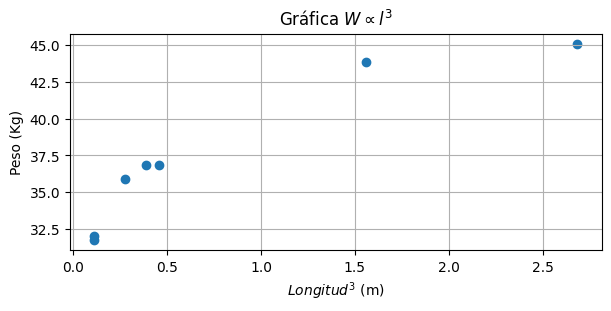

In [3]:
'''
Gráficación de Los datos. Comenzamos crean listas de pero y longitud. 
Y se almacenaron los datos que se muestran en la tabla.
'''
peso = [36.83,31.75,43.815,36.83,32.06,45.08,35.88]
longitud = [0.77, 0.48,1.16,0.73,0.48,1.39,0.65]
longitud_al_cubo = [math.pow(longitud[i], 3) for i in range(len(longitud))]
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained') 
ax.scatter(longitud_al_cubo, peso)
ax.set_xlabel('$Longitud^{3}$ (m)')
ax.set_ylabel('Peso (Kg)')
plt.title('Gráfica $W \propto l^{3}$')
plt.grid()
plt.show()

Utiliza los datos anteriores y el método de tu preferencia para estimar un buen valor de $K$ para nuestro modelo de similaridad geométrica $W=Kl^3$.<br>
Grafica la estimación contra los datos. ¿Qúe tan bueno es el ajuste? ¿Hay algún efecto que nuestro modelo no capture?

In [19]:
'''
Se obtiene el valor de K por cada par peso[i], y su respectivo longitud_al_Cubo[i] calculando su razón.
Después de calcular la k_i se agrega a una lista llamada k_values
'''
k_values = [peso[i]/ longitud_al_cubo[i] for i in range(len(peso))]
# Se crea una variable que va almacenar el promedio de las k's obtenidas
promedio_k = 0.0
#Variable para ir guardando la suma de las k's
suma = 0.0
for k in k_values:
    suma += k
promedio_k = suma/7
print(f'Nuestra k estimada es: {promedio_k}')

Nuestra k estimada es: 132.54863664125932


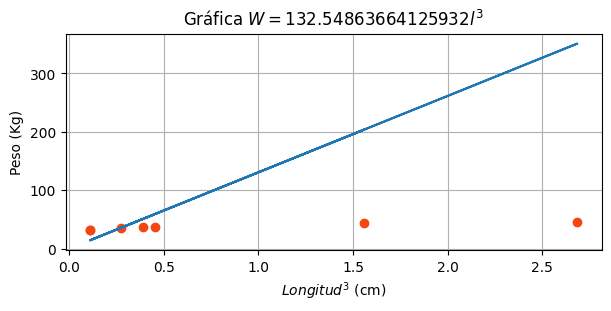

In [20]:
#Graficando el modelo Ajustado
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained') 
ax.scatter(longitud_al_cubo, peso, color = '#f44611')
ax.plot(longitud_al_cubo, [k*longitud_al_cubo[i] for i in range(len(longitud_al_cubo))])
ax.set_xlabel('$Longitud^{3}$ (cm)')
ax.set_ylabel('Peso (Kg)')
plt.title('Gráfica $W = 132.54863664125932l^{3}$')
plt.grid()
plt.show()

Por lo tanto nuestro modelo quedaría así:
$$ W = Kl^{3}$$
con $K = 132.54863664125932$ y  $l^{3}$ son los valores de las longitudes conocidas elevadas al cubo


Sin embargo el ajuste no es bueno, pues visualmente en la gráfica podemos notar hay dos datos que se quedan muy abajo dela recta. Podemos asegurar que para pesos lo suficientemente grandes la relación entre la longitud y el peso ya no es proporcional.

Este es un código en c++, interprétalo y explica lo que hace. Compara el resultado con tu respuesta anterior.

```c++
#include <iostream>
#include <math.h>
using namespace std;

 int main(){
   int numPeces = 7;
   float Peso[numPeces] = {36.83,31.75,43.815,36.83,32.06,45.08,35.88};
   float Longitud[numPeces]     = {0.77,0.48,1.16,0.73,0.48,1.39,0.65};
   float LongitudC[numPeces];
   float pendientes[numPeces];
   float pendienteProm = 0;

   for(int i=0;i<numPeces;i++){
     LongitudC[i]  = pow(Longitud[i],3);
   }
   for(int i=0;i<numPeces;i++){
     pendientes[i] = (LongitudC[i+1] - LongitudC[i]) / (Peso[i+1] - Peso[i]);
   }

   for(int i=0;i<numPeces-1;i++){
     cout<< pendientes[i] <<endl;
     pendienteProm += pendientes[i];
   }
   pendienteProm /= numPeces;
   cout<< "Pendiente promdeio: "<< pendienteProm;
   return 0;
 }
```

**Interpretación Y Explicación del código de C++:**


El código tiene creadas dos listas, una que corresponde a el peso y la otra a la longitud, ambas ya contienen los datos que nos da la práctica. Avanzando en el script hay inicializados dos arreglos  uno que se llama **LongitudC** y el otro **pendientes**.

Comenzando con el primer **for**, en este lo que hacemos es llenar el arreglo **LongitudC** donde cada entrada corresponde a a un elemento del arreglo **Longitud** pero elevandose al cubo. 


El siguiente ciclo **for** también sirve para llenar el arreglo  **pendientes** donde cada enterda de este nuevo arreglo es un cociente de la siguiente forma:
$$\frac{\text{LongitudC[i+1] - LongitudC[i]}}{\text{Peso[i+1] - Peso[i]}} $$
Es decir en el numerador está la diferencia de dos longitudes al cubo consecutivas y en el denominador su correspondiente peso. Semejante a calcular la pendiente para una recta cuando conoces dos puntos.


En el tercer y último **for** mandamos a imprimir en pantalla una pendiente del arreglo **pendientes** y después sumamos esa pendiente a la variable **pendienteProm**, se repite este proceso hasta que recorramos todas las pendientes. Al terminar de ejecutar este ciclo la variable **pendienteProm** habrá acumulado la suma de todas las pendientes del arreglo **pendientes**. Por último calculamos el promedio de estas pendientes diviendo entre **numPeces**, para que antes del **return 0** imprimamos el valor de la **pendienteProm**

Estimamos que $K=13.9045$, usando la ecuacion punto pendiente $$ y = m(x -x_1) + y_1  $$
con el punto $(0.77^3,36.83)$<br/>
Grafique la recta con los puntos y diga sus observaciones.

Vamos a obtener la ecuación de la recta con los datos proporcionados
$$ W = k(l^{3}- x_1) + y_1$$
$$ W = 13.9045(l^{3}- (0.77)^{3}) + 36.83$$
$$ W = 13.9045(l^{3}- 0.456533) + 36.83$$
$$ W = 13.9045l^{3}- 6.3478630985 + 36.83$$
$$ W = 13.9045l^{3} + 30.482137$$
Haciendo $u = l^{3}$

$$ W = 13.9045u + 30.482137$$

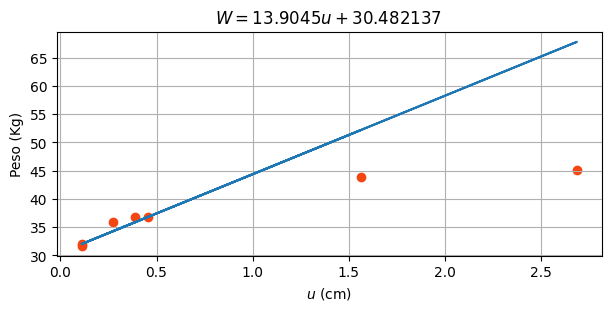

In [21]:
'''
Abajo creamos una función que es la linea recta a la que llegamos mediante álgebra. Basicamente sus entradas son u y
y te retorna 13.9045*u + 30.482137
'''
def LineaW(u):
    return 13.9045*u + 30.482137
'''
En la linea de abajo creamos un arreglo nombrado u, basicamente llenamos esta lista con las imagenes resultantes de evaluar
la función 'Lineaw' donde las entradas fueron las longitudes que tenemos elevadas al cubo
'''
u = [LineaW(longitud_al_cubo[i]) for i in range(len(longitud_al_cubo))]
'''
Aquí empieza el código para La gráficación
'''
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained') 
ax.scatter(longitud_al_cubo, peso, color = '#f44611')
ax.plot(longitud_al_cubo,u)
ax.set_xlabel('$u$ (cm)')
ax.set_ylabel('Peso (Kg)')
plt.title('$W = 13.9045u + 30.482137$ ')
plt.grid(True)
plt.show()

##### Coeficiente de correlación de Pearson 
El coeficiente de correlación entre las variables aleatorias X y Y con varialza finita distintas de cero, se define como el número: 

$$ \rho_{x,y} = \dfrac{n \sum x_{i}y_{i} -\sum x_{i}\sum y_{i}}{\sqrt{n\sum x_{i}^{2} -\left( \sum x_{i}\right )^{2}} \sqrt{\sum y_{i}^{2} -\left( n \sum y_{i}\right)^{2}}} = \frac{Cov(X, Y)}{\sqrt{Var(X) Var(Y)}} $$

El coeficiente de correlación se encuentra entre $−1≤\rho_{x,y} ≤1$. Mide la dependencia lineal entre dos variables aleatorias, si es $-1$ o $1$ la correlación es exacta.
- Si $\rho_{x,y} ≈1$ indica una correlación lineal directa, es decir, $Y=aX+b$. 
- Si $\rho_{x,y} ≈-1$ indica una correlación lineal negativa, es decir, $Y=−aX+b$.
- Si r = 0, no existe relación lineal.

Calcule el coeficiente de correlacion de $W$ y $l$ e interpretelo. Nota: Puede usar las funciones ```cov()``` y ```var()``` de python.

In [22]:
coeficiente_De_pearson=(np.cov(peso, longitud)[0][1])/math.sqrt(np.cov(peso, longitud)[0][0]* np.cov(peso,longitud)[1][1])
print(f'El coeficiente de Correlación de Pearson es {coeficiente_De_pearson}')

El coeficiente de Correlación de Pearson es 0.9871935788371415


**Interpretación:**

Podemos afirmar que hay dependecia lineal entre el Peso y la Longitud. Por otro lado $\rho_{peso,longitud} ≈1$ así que hay una correlación lineal directa, y visualmente también tiene sentido ya que la gráfica descrita arriba es una linea recta.

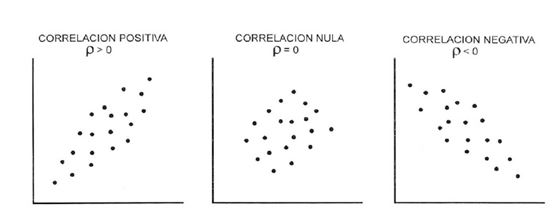
El modelo parece ser razonable, pero al aplicarlo premia a los peces grandes e ignora que hay peces gordos (en nuestro modelo un pez gordo terminará pesando lo mismo que uno flaco). 

Propongamos un nuevo modelo: <br>
Ahora, supondremos que solo la sección transversal de los peces es geométricamente similar y consideraremos como dimensión característica su circunferencia. Sin embargo, en un mismo pez la circunferencia es variable así que la definimos como la máxima de las circunferencias (el punto donde el pez es más ancho). <br>

Así tenemos que el modelo es 
$$V\propto l_e(A_{prom})$$
donde $l_e$ es la longitud efectiva (sin cola) y $A_{prom}$ es el área promedio de un corte. Dos nuevos supuestos para este modelo serán que 
- $l_e ∝ l$
- $A_{prom} ∝ A_{max}$

Ahora, observemos que $C_{max} =2πr$, entonces, 
\begin{eqnarray} A_{max} & = & r^{2} \pi\  & = & \left(C_{max}\left(\frac{1}{2\pi}\right)\right)^2\pi \ & = & C_{max}^2\left(\frac{1}{4\pi^2}\right)\pi\ & = &\frac{C_{max}^2}{4\pi}\ & \propto &C_{max}^2 \end{eqnarray}
entonces tenemos que $A_{prom} ∝ C_{max}^2 $ donde $C_{max}$ es la circunferencia máxima.
Por lo tanto, como tenemos el supuesto de densidad constante, sucede que $W∝V$ y así nuestro nuevo modelo es $W∝l\cdot C_{max}^2$ 

Ahora añadiremos una dimensión extra a nuestra tabla anterior. Supongamos que además de los datos anteriores también tenemos disponible la circunferencia máxima de cada pez.

| Peso(Kg)         |36.83| 31.75| 43.815| 36.83| 32.06| 45.08| 35.88|
|------------------|-----|------|-------|------|------|------|------|
|Longitud(m)      |0.77 | 0.48 | 1.16  | 0.73 | 0.48 | 1.39 | 0.65 |
|Circunferencia(cm)|24.77| 21.29| 27.94 |24.77 |21.59 |31.75 |22.86 |

Realice el ajuste del nuevo modelo en términos de la circunferencia ¿Cómo queda la fórmula explicita del modelo?¿Qué tan bueno es el ajuste? 

Dado que  $W∝l\cdot C_{max}^2$ entonces $W =K\cdot l\cdot C_{max}^2 $. Vamos a aproximar esa $K$. Despejando la $K$ 
$$ K =  \frac{W}{l\cdot C_{max}^2} $$

El nuevo modelo explicitamente queda de la siguiente manera:

In [15]:
'''
Aqí creamos una lista que contiene las circunferencias medidas de los peces. Posteriormente calculamos los valores de k
con cada peso, longitud y circunferencia que conocemos del pez a partir de la ecuación de arriba.
'''
circunferencia =[24.77, 21.29, 27.94, 24.77, 21.59, 31.75, 22.86]
k_values = [peso[i]/(longitud[i]*math.pow(circunferencia[i], 2)) for i in range(len(circunferencia))]

#En el bloque de código de abajo, calculamos el promedio de la lista k_values
promedio_k = sum(k_values)/7
print(f'La k aproxima es {promedio_k}')
# Aqií obtenemos los nuevos pesos de acuerdo al nuevo modelo 
pesoNewModel = [promedio_k*longitud[i]*(math.pow(circunferencia[i], 2)) for i in range(len(circunferencia))]
print(pesoNewModel)

La k aproxima es 0.09079955297280677
[42.896953364780295, 19.75496527613836, 82.22322429685579, 40.668540202973524, 20.31562709187061, 127.22895787242354, 30.842496147260313]


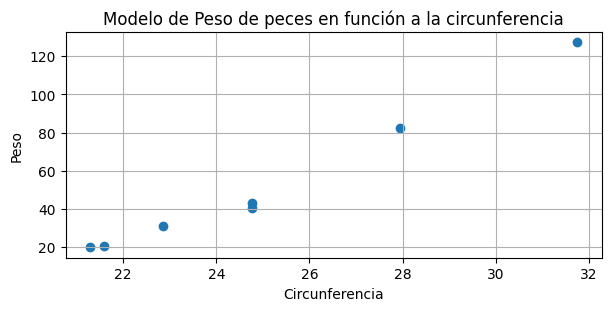

In [14]:
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')
ax.scatter(circunferencia, pesoNewModel)
ax.set_xlabel('Circunferencia')
ax.set_ylabel('Peso')
plt.grid(True)
plt.title('Modelo de Peso de peces en función a la circunferencia')
plt.show()

Sin embargo el modelo no es muy bueno por que para algunas longitudes y circunferencias el peso resultante se aleja mucho del peso real de la tabla.

## Ejercicio 3
La siguiente tabla muestra los datos concernientes al consumo Q de energía eléctrica, en la Ciudad de México, normalizados al año 1990.

| Año        |1900 | 1910 | 1920  | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |  2000 |
|------------|-----|------|-------|------|------|------|------|------|------|------|-------|
|Consumo     |1    | 2.01 | 4.06  | 8.17 | 16.44| 33.12| 66.69|134.29|270.43|544.57|1096.63|

- Grafique los datos
- Elija la familia de modelos mas apropiadas (lineal,exponencial,polinomica,etc). Calcule los parámetros
- ¿Cómo va aumentando el consumo de energía con el paso del tiempo? Interprete

In [2]:
#Cargamos los datos
Anio = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
consumo  = [1,2.01,4.06,8.17,16.44,33.12,66.69,134.29,270.43,544.57,1096.63]

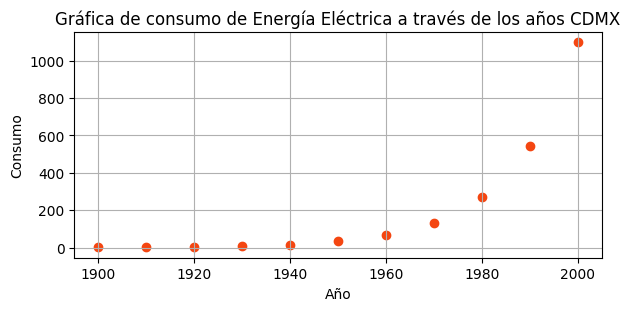

In [3]:
#Graficamos
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')
ax.scatter(Anio, consumo, color = '#f44611')
ax.set_xlabel('Año')
ax.set_ylabel('Consumo')
plt.grid(True)
plt.title('Gráfica de consumo de Energía Eléctrica a través de los años CDMX')
plt.show()

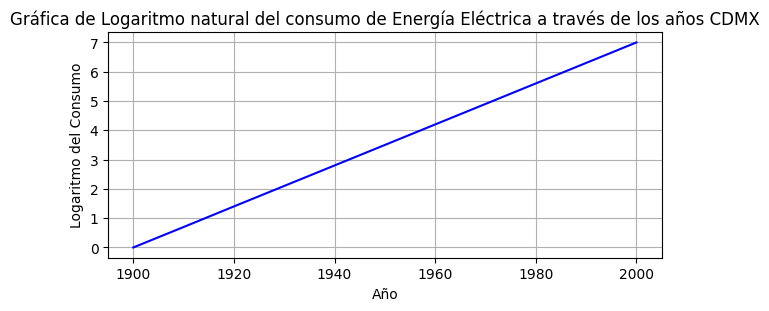

In [23]:
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')
ax.plot(Anio, np.log(consumo), 'blue')
ax.set_xlabel('Año')
ax.set_ylabel('Logaritmo del Consumo')
plt.grid(True)
plt.title('Gráfica de Logaritmo natural del consumo de Energía Eléctrica a través de los años CDMX')
plt.show()

Sacar el $ln(x)$ nos sirve mucho para poder ajustar nuestros datos a una recta y también para evitar trabajar con valores muy grandes. Ahora como ya tenemos uan recta nos debe importar calcular la pendiente de esa recta. Recordando la Ecuación:
$$ m = \frac{y_2 - y_1}{x_2 - x_1} $$

Pasamos a codificar esa función.

In [28]:
def m(u_1,u_2, w_1,w_2):
    return (w_2 - w_1)/(u_2 - u_1)

In [29]:
pendiente = m(Anio[0],Anio[10], np.log(consumo[0]), np.log(consumo[10]))
print(f'La pendiente de la recta de arriba es: {pendiente}')

La pendiente de la recta de arriba es: 0.06999997119881901


Con la información obtenida ya podemos graficar y ajustar nuestro modelo .

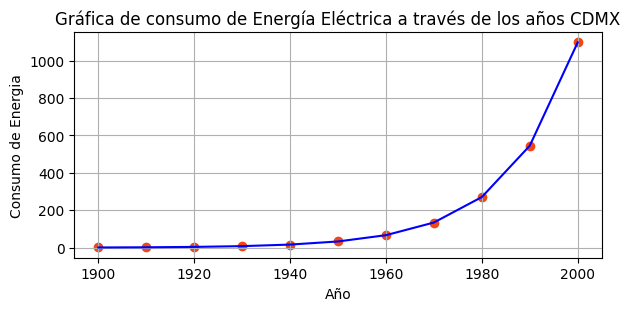

In [41]:
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')
ax.plot(Anio, [np.exp(pendiente*(Anio[i] - 1900)) for i in range(len(Anio))], 'blue')
ax.scatter(Anio, consumo, color = '#f44611')
ax.set_xlabel('Año')
ax.set_ylabel('Consumo de Energia')
plt.grid(True)
plt.title('Gráfica de consumo de Energía Eléctrica a través de los años CDMX')
plt.show()

De esta forma podemo modelar el concusmo de Energía en la CDMX con la siguiente ecuación:
$$ C = e^{k(x - 1900)}$$ con $k = 0.06999997119881901$